# Pymaceuticals Inc.
* Of the four treatments being considered (Capomulin, Infubinol, Ketapril, and Placebo), Capomulin was the most effective having the greatest reductive effect (-19%) on tumor volume, lowest metastatic spread (~1.48 sites), and 84% survival of mice over the study period. [Although unreported: Ramicane had the best reductive effect -22% and 1.25 metastatic sites. It had a slightly lower survival rate compared to Capomulin with 80%.]
* Ketapril was the ineffective to worsening treatment option compared to control (Placebo) for reasons of increasing tumor volume (+57%), having the fastest metastatic spread (~3.36 sites), and idential survival rates to Placebo (44%) by the end of the study period.
* Treatment with Infubinol is likely the worst option being considered. Despite having better results than both Ketapril and Placebo on tumor growth (+46% against +57% and +51%, respectively) and metastatic spread (2.11 against 3.36 and 3.27 sites, respectively), Infubinol had the worst survival rates at 36% against 44% for both. A conclusion that may be made from this finding is that factors other than tumor reduction/growth and metastasis affect survival rates. [Although unreported: Propriva had the worst survival rate with 27%)]

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(trial_df, drug_df, how="left", on="Mouse ID")

# Display the data table for preview
combined_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = combined_data_df.groupby(["Drug", "Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor)

# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_error = combined_data_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_error_df = pd.DataFrame(tumor_error)
ted = tumor_error_df

# Preview DataFrame
ted.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
reform_tumor_df = mean_tumor_df.pivot("Timepoint","Drug")
rtd = reform_tumor_df

# Preview that Reformatting worked
rtd.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

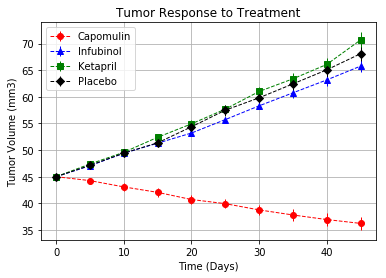

In [5]:
# Generate the Plot (with Error Bars)
plt.errorbar(rtd.index, rtd["Tumor Volume (mm3)"]["Capomulin"], marker="o", ls="dashed", color="red", linewidth=1, yerr=ted["Tumor Volume (mm3)"]["Capomulin"])
#plt.errorbar(rtd.index, rtd["Tumor Volume (mm3)"]["Ceftamin"], marker="v", ls="dashed", color="orange", linewidth=1, yerr=ted["Tumor Volume (mm3)"]["Ceftamin"])
plt.errorbar(rtd.index, rtd["Tumor Volume (mm3)"]["Infubinol"], marker="^", ls="dashed", color="blue", linewidth=1, yerr=ted["Tumor Volume (mm3)"]["Infubinol"])
plt.errorbar(rtd.index, rtd["Tumor Volume (mm3)"]["Ketapril"], marker="s", ls="dashed", color="green", linewidth=1, yerr=ted["Tumor Volume (mm3)"]["Ketapril"])
#plt.errorbar(rtd.index, rtd["Tumor Volume (mm3)"]["Naftisol"], marker="<", ls="dashed", color="yellow", linewidth=1, yerr=ted["Tumor Volume (mm3)"]["Naftisol"])
plt.errorbar(rtd.index, rtd["Tumor Volume (mm3)"]["Placebo"], marker="D", ls="dashed", color="black", linewidth=1, yerr=ted["Tumor Volume (mm3)"]["Placebo"])
#plt.errorbar(rtd.index, rtd["Tumor Volume (mm3)"]["Propriva"], marker=">", ls="dashed", color="indigo", linewidth=1, yerr=ted["Tumor Volume (mm3)"]["Propriva"])
#plt.errorbar(rtd.index, rtd["Tumor Volume (mm3)"]["Ramicane"], marker="8", ls="dashed", color="violet", linewidth=1, yerr=ted["Tumor Volume (mm3)"]["Ramicane"])
#plt.errorbar(rtd.index, rtd["Tumor Volume (mm3)"]["Stelasyn"], marker="p", ls="dashed", color="brown", linewidth=1, yerr=ted["Tumor Volume (mm3)"]["Stelasyn"])
#plt.errorbar(rtd.index, rtd["Tumor Volume (mm3)"]["Zoniferol"], marker="*", ls="dashed", color="cyan", linewidth=1, yerr=ted["Tumor Volume (mm3)"]["Zoniferol"])

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(loc="upper left")

# Save the Figure
plt.savefig("TumorResponsetoTx-Brief.png")

# In documentation I have a chart with all of the drugs charted called "TumorResponsetoTx-Full.png"

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = combined_data_df.groupby(["Drug", "Timepoint"], as_index=False)["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met)

# Preview DataFrame
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_error = combined_data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
met_error_df = pd.DataFrame(met_error)
med = met_error_df

# Preview DataFrame
med.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
reform_met_df = mean_met_df.pivot("Timepoint","Drug")
rmd = reform_met_df
# Preview that Reformatting worked
rmd.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

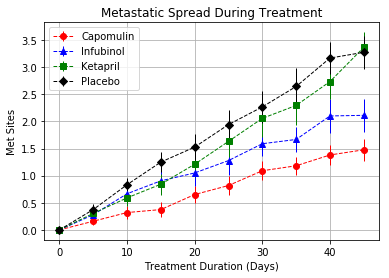

In [9]:
# Generate the Plot (with Error Bars)
plt.errorbar(rmd.index, rmd["Metastatic Sites"]["Capomulin"], marker="o", ls="dashed", color="red", linewidth=1, yerr=med["Metastatic Sites"]["Capomulin"])
#plt.errorbar(rmd.index, rmd["Metastatic Sites"]["Ceftamin"], marker="v", ls="dashed", color="orange", linewidth=1, yerr=med["Metastatic Sites"]["Ceftamin"])
plt.errorbar(rmd.index, rmd["Metastatic Sites"]["Infubinol"], marker="^", ls="dashed", color="blue", linewidth=1, yerr=med["Metastatic Sites"]["Infubinol"])
plt.errorbar(rmd.index, rmd["Metastatic Sites"]["Ketapril"], marker="s", ls="dashed", color="green", linewidth=1, yerr=med["Metastatic Sites"]["Ketapril"])
#plt.errorbar(rmd.index, rmd["Metastatic Sites"]["Naftisol"], marker="<", ls="dashed", color="yellow", linewidth=1, yerr=med["Metastatic Sites"]["Naftisol"])
plt.errorbar(rmd.index, rmd["Metastatic Sites"]["Placebo"], marker="D", ls="dashed", color="black", linewidth=1, yerr=med["Metastatic Sites"]["Placebo"])
#plt.errorbar(rmd.index, rmd["Metastatic Sites"]["Propriva"], marker=">", ls="dashed", color="indigo", linewidth=1, yerr=med["Metastatic Sites"]["Propriva"])
#plt.errorbar(rmd.index, rmd["Metastatic Sites"]["Ramicane"], marker="8", ls="dashed", color="violet", linewidth=1, yerr=med["Metastatic Sites"]["Ramicane"])
#plt.errorbar(rmd.index, rmd["Metastatic Sites"]["Stelasyn"], marker="p", ls="dashed", color="brown", linewidth=1, yerr=med["Metastatic Sites"]["Stelasyn"])
#plt.errorbar(rmd.index, rmd["Metastatic Sites"]["Zoniferol"], marker="*", ls="dashed", color="cyan", linewidth=1, yerr=med["Metastatic Sites"]["Zoniferol"])


plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("MetSpreadDuringTx-Brief.png")

# In documentation I have a chart with all of the drugs charted called "MetSpreadDuringTx-Full.png"

# Show the Figure
plt.show()


## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (We can pass any metric)
mouse_count = combined_data_df.groupby(["Drug", "Timepoint"], as_index=False)["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
reform_count_df = mouse_count_df.pivot("Timepoint","Drug")
rcd = reform_count_df

# Preview the Data Frame
rcd.head()

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

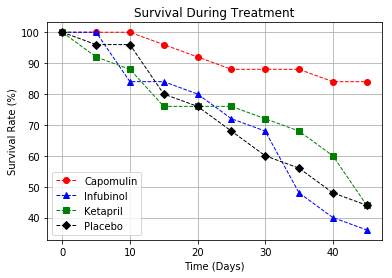

In [12]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(rcd.index, rcd["Mouse ID"]["Capomulin"]/25*100, marker="o", ls="dashed", color="red", linewidth=1)
#plt.errorbar(rcd.index, rcd["Mouse ID"]["Ceftamin"]/25*100, marker="v", ls="dashed", color="orange", linewidth=1)
plt.errorbar(rcd.index, rcd["Mouse ID"]["Infubinol"]/25*100, marker="^", ls="dashed", color="blue", linewidth=1)
plt.errorbar(rcd.index, rcd["Mouse ID"]["Ketapril"]/25*100, marker="s", ls="dashed", color="green", linewidth=1)
#plt.errorbar(rcd.index, rcd["Mouse ID"]["Naftisol"]/25*100, marker="<", ls="dashed", color="yellow", linewidth=1)
plt.errorbar(rcd.index, rcd["Mouse ID"]["Placebo"]/25*100, marker="D", ls="dashed", color="black", linewidth=1)
#plt.errorbar(rcd.index, rcd["Mouse ID"]["Propriva"]/26*100, marker=">", ls="dashed", color="indigo", linewidth=1)
#plt.errorbar(rcd.index, rcd["Mouse ID"]["Ramicane"]/25*100, marker="8", ls="dashed", color="violet", linewidth=1)
#plt.errorbar(rcd.index, rcd["Mouse ID"]["Stelasyn"]/26*100, marker="p", ls="dashed", color="brown", linewidth=1)
#plt.errorbar(rcd.index, rcd["Mouse ID"]["Zoniferol"]/25*100, marker="*", ls="dashed", color="cyan", linewidth=1)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("SurvivalDuringTx-Brief.png")

# In documentation I have a chart with all of the drugs charted called "SurvivalDuringTx-Full.png"

# Show the Figure
plt.show()

In [13]:
# Calculate the percent changes for each drug
percent_change = (rtd.loc[45, :] - rtd.loc[0, :])/rtd.loc[0, :] * 100

# Display the data to confirm
percent_series = percent_change["Tumor Volume (mm3)"]
percent_series

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

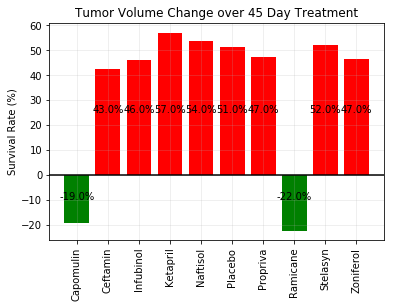

In [14]:
# Splice the data between passing and failing drugs
plt.bar(np.arange(len(percent_series)), 
        percent_series, color = ["red" if percent_series[r] > 0 else "green" for r in np.arange(len(percent_series))])

# Orient widths. Add labels, tick marks, etc.
plt.title("Tumor Volume Change over 45 Day Treatment")
plt.ylabel("Survival Rate (%)")
plt.axhline(y=0, color = "black")
plt.grid(alpha=0.25)
x_axis = len(percent_change.index)

plt.xticks(np.arange(len(percent_series)), percent_series.index, rotation="vertical")

# Use functions to label the percentages of changes
# Based on Stack Overflow solutions and specifically user racquesta's solution
count = 0

for r in percent_series:
    if r < 0:
        y_coor = -10
    else:
        y_coor = 25
    plt.text(count, y_coor, str(round(r,0)) + '%', ha = 'center', color = 'black')
    count += 1

# Save the Figure
plt.savefig("TumorChange45Days.png")

# Show the Figure
plt.show()